# Visualização em Grafo de um Banco de Dados

#### Alunos: Igor Cortes Junqueira e Igor Patrício Michels

### Objetivos

Criar uma visualização em grafos do banco de dados desenvolvido para a primeira avaliação de Banco de Dados.

### Fontes

O banco de dados utilizado é o que foi elaborado para a [primeira avaliação](https://github.com/IgorMichels/USA_Flights), o qual pode ser [encontrado aqui](https://gvmail-my.sharepoint.com/:f:/g/personal/b39254_fgv_edu_br/Ev8i0xwOqnFFh_q3gTqvNAkBhzL_dpV6_ljzh82vJsTnNg?e=7ubrsl).

## Modelagem

Abaixo temos o modelo lógico do banco de dados a ser trabalhado.


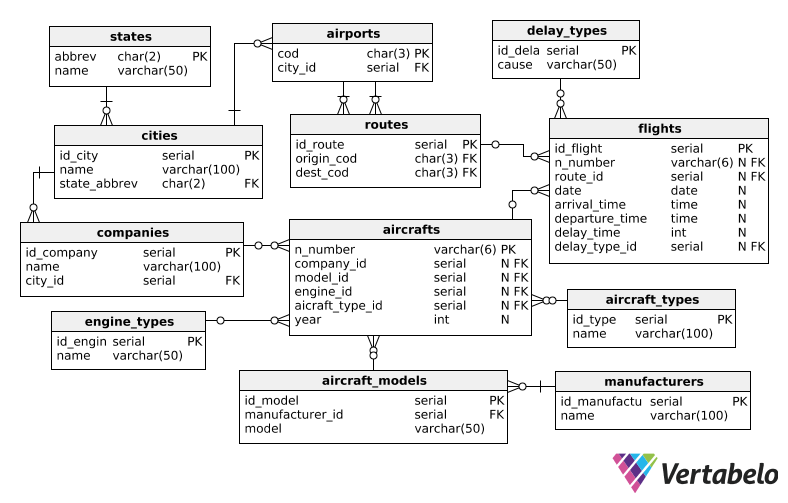

In [2]:
!pip install pymysql

     |████████████████████████████████| 47 kB 1.2 MB/s eta 0:00:011


In [1]:
import pymysql
import getpass
import pandas as pd

In [6]:
p = getpass.getpass()

 ··········


In [7]:
conn = pymysql.connect(host='localhost',
                       user='root', 
                       passwd=p, 
                       database='flights')

cur = conn.cursor()

Alguns testes...

In [9]:
query = '''
SELECT *
FROM Cities;
'''

pd.read_sql_query(query, conn)

id_city                name States_abrev
0          1             ATLANTA           GA
1          2         SPRINGFIELD           MO
2          3  SARASOTA/BRADENTON           FL
3          4             DETROIT           MI
4          5            NEW YORK           NY
..       ...                 ...          ...
406      407            VANDALIA           OH
407      408              WAUPUN           WI
408      409          WILMINGTON           DE
409      410          WILMINGTON           OH
410      411           KNOXVILLE           TN

[411 rows x 3 columns]

In [10]:
query = '''
select * from States;
'''

pd.read_sql_query(query, conn)

abreviation                                            name
0           AK                                          ALASKA
1           AL                                         ALABAMA
2           AR                                        ARKANSAS
3           AZ                                         ARIZONA
4           CA                                      CALIFORNIA
5           CO                                        COLORADO
6           CT                                     CONNECTICUT
7           DC                            DISTRICT OF COLUMBIA
8           DE                                        DELAWARE
9           FL                                         FLORIDA
10          GA                                         GEORGIA
11          HI                                          HAWAII
12          IA                                            IOWA
13          ID                                           IDAHO
14          IL                                        ILLINOIS
15          IN                                         INDIANA
16          KS                                          KANSAS
17          KY                                        KENTUCKY
18          LA                                       LOUISIANA
19          MA                                   MASSACHUSETTS
20          MD                                        MARYLAND
21          ME                                           MAINE
22          MI                                        MICHIGAN
23          MN                                       MINNESOTA
24          MO                                        MISSOURI
25          MS                                     MISSISSIPPI
26          MT                                         MONTANA
27          NC                                  NORTH CAROLINA
28          ND                                    NORTH DAKOTA
29          NE                                        NEBRASKA
30          NH                                   NEW HAMPSHIRE
31          NJ                                      NEW JERSEY
32          NM                                      NEW MEXICO
33          NV                                          NEVADA
34          NY                                        NEW YORK
35          OH                                            OHIO
36          OK                                        OKLAHOMA
37          OR                                          OREGON
38          PA                                    PENNSYLVANIA
39          PR                                     PUERTO RICO
40          RI                                    RHODE ISLAND
41          SC                                  SOUTH CAROLINA
42          SD                                    SOUTH DAKOTA
43          TN                                       TENNESSEE
44          TT  U.S. PACIFIC TRUST TERRITORIES AND POSSESSIONS
45          TX                                           TEXAS
46          UT                                            UTAH
47          VA                                        VIRGINIA
48          VI                             U.S. VIRGIN ISLANDS
49          VT                                         VERMONT
50          WA                                      WASHINGTON
51          WI                                       WISCONSIN
52          WV                                   WEST VIRGINIA
53          WY                                         WYOMING

Começando a ver querys potencialmente interessantes

In [11]:
query = '''
SELECT Companies.name AS Company,
       Count(Companys_id) AS Aircrafts
FROM Aircrafts
INNER JOIN Companies ON Companies.id_company = Aircrafts.Companys_id
GROUP BY Companys_id
ORDER BY Aircrafts DESC;
'''

pd.read_sql_query(query, conn)

Company  Aircrafts
0                 DELTA AIR LINES INC        882
1                 UNITED AIRLINES INC        856
2               AMERICAN AIRLINES INC        834
3         WELLS FARGO BANK NA TRUSTEE        802
4              SOUTHWEST AIRLINES INC        607
..                                ...        ...
88                 EADS NORTH AMERICA          1
89                DUGGAN HOLDINGS LLC          1
90  DOUGHERTY AIR TRUSTEE LLC TRUSTEE          1
91                DESOUZA FERDINAND E          1
92   CLYDESDALE AVIATION HOLDINGS LLC          1

[93 rows x 2 columns]

Talvez possamos pegar apenas as 20 maiores companhias